In [14]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import *




# Student

## Load and preprocess data 

In [17]:
data = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Studen prformace engineering/DATA (1).csv')
column_labels = [
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers' education",
    "Fathers' education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers' occupation",
    "Fathers' occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester (/4.00)",
    "Expected Cumulative grade point average in graduation (/4.00)",
    "Course ID",
    "GRADE"
]


In [18]:
# Define a function to map grades to binary values
def map_grade(grade):
    if grade > 6:
        return 1  # Good
    else:
        return 0  # Bad

# Apply the mapping function to the GRADE column
data['GRADE'] = data['GRADE'].apply(map_grade)

# Print the updated DataFrame
print(data)

     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   1   2   1   2   1   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   1   3   2   2   1   5   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   1   3   3   2   1   4   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   2   1   2   1   2   1   5   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   2   1   3   2   3   1   5   

     30  COURSE ID  GRADE  
0     1          1     

In [19]:
# Assuming you have a dataframe df with a 'GRADE' column
threshold = 6
classifieddata = data
#classifieddata['GRADE'] = classifieddata['GRADE'].apply(lambda x: 'good' if x > threshold else 'bad')
classifieddata

classifieddata= classifieddata.drop('STUDENT ID', axis=1)
classifieddata.columns  = column_labels

In [21]:
unique_value_counts = classifieddata['GRADE'].value_counts()
unique_value_counts

GRADE
0    128
1     17
Name: count, dtype: int64

In [22]:
X = classifieddata.drop('GRADE', axis=1)
y = classifieddata['GRADE']
print(X.shape)
print(y.shape)

(145, 31)
(145,)


In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(108, 31)
(37, 31)


### Convert Data to Scalar


In [24]:
#X_train, X_test, y_train, y_test = train_test_split(classifieddata, column_labels, test_size=0.2, random_state=42)
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)



## Algorithm

## Keras Model: Name = model

In [36]:

# Define and train a simple neural network using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])


In [37]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6430 - val_accuracy: 0.8108
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6468 - val_accuracy: 0.8108
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6506 - val_accuracy: 0.8108
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6541 - val_accuracy: 0.8108
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6575 - val_accuracy: 0.8108
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6607 - val_accuracy: 0.8108
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6638 - val_accuracy: 0.8108
Epoch 8/10
4/4 [===========

In [44]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 13ms/step - loss: 0.6725 - accuracy: 0.8108
Test loss: 0.6725, Test accuracy: 0.8108


## MLP model

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


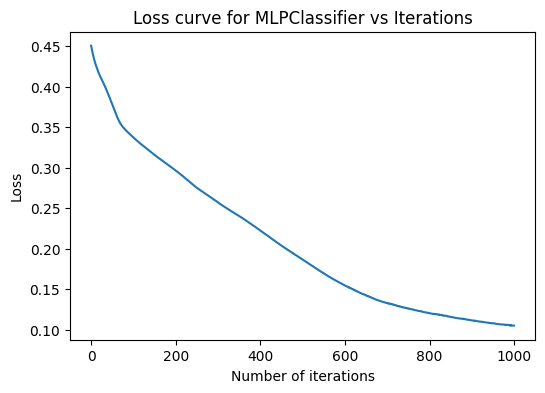

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

mlp1 = MLPClassifier(
                random_state=1,
                hidden_layer_sizes = (5,3),
                activation = 'relu',
                solver = 'adam',
                learning_rate_init = 1e-3,
                alpha = 0,
                n_iter_no_change = 25,
                max_iter=1000,
                )

mlp1.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(mlp1.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.title('Loss curve for MLPClassifier vs Iterations')
plt.show()

In [11]:
# Define different training set sizes (e.g., 10%, 20%, ..., 90% of the data)
train_sizes, train_scores, test_scores = learning_curve(
mlp1 , X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


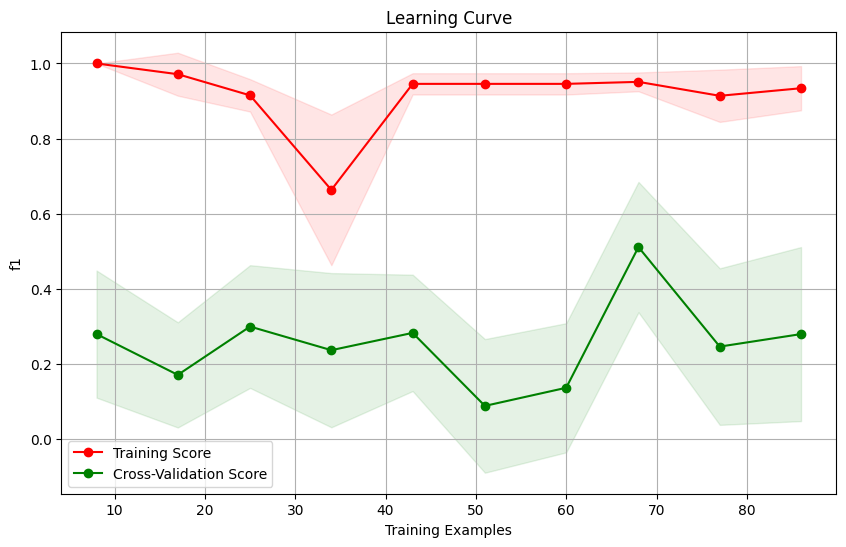

In [12]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("f1")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

## History

The loss value of 0.3737 indicates how well the model's predictions match the actual labels, and the accuracy of 0.8919 indicates the percentage of correct predictions on the test data.

In [52]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
4/4 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6754 - val_accuracy: 0.8108
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6786 - val_accuracy: 0.8108
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6816 - val_accuracy: 0.8108
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6845 - val_accuracy: 0.8108
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6874 - val_accuracy: 0.8108
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6903 - val_accuracy: 0.8108
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6929 - val_accuracy: 0.8108
Epoch 8/10
4/4 [===========

In [53]:

#Validation accuracy
history.history['val_accuracy']

[0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654,
 0.8108108043670654]

In [54]:
#Training loss
history.history['loss']
#Validation loss
history.history['val_loss']
#Training accuracy
history.history['accuracy']

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [55]:
#Training metric_name
history.history['Precision']
#Validation metric_name
history.history['val_Precision']

KeyError: 'Precision'

In [56]:
model.fit(X, y, validation_split=0.2)

4/4 [==============================] - 0s 49ms/step - loss: 0.6283 - accuracy: 0.7759 - val_loss: 1.4098e-04 - val_accuracy: 1.0000


In [57]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test))

4/4 [==============================] - 0s 30ms/step - loss: 0.6796 - accuracy: 0.8796 - val_loss: 0.8687 - val_accuracy: 0.8649


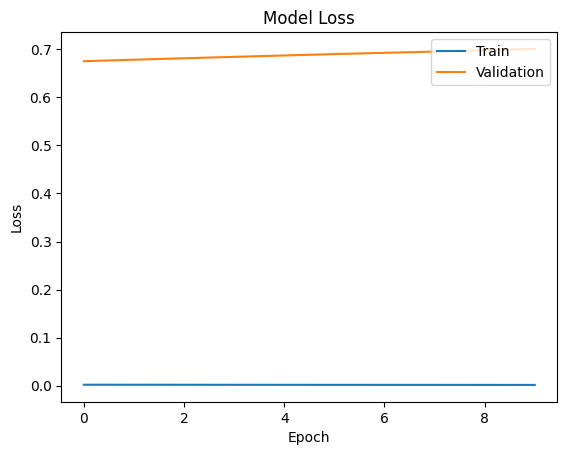

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

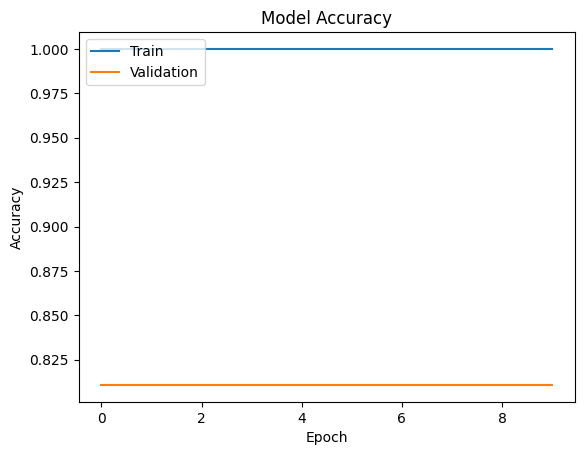

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


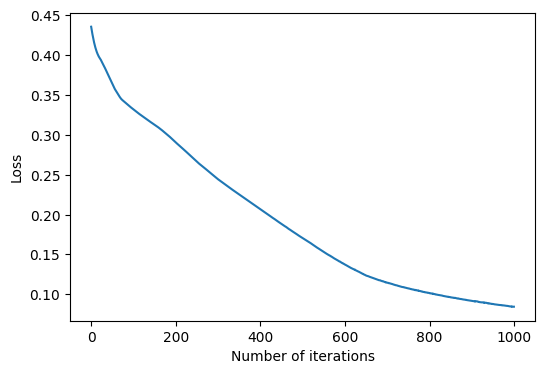

## GridSearch

Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 100}


In [39]:
# Initialize MLPClassifier
mlp = MLPClassifier()

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [ (50,), (100,), (100, 2), (30,30)],  # You can also try different layer configurations like (50,50) for two layers of 50
    'max_iter': [20,50,100, 200, 500,],
    'activation': ['relu', 'tanh', 'logistic'],

}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Perform grid search on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# You can also get the best estimator directly
best_estimator = grid_search.best_estimator_

# Evaluate on the test set
test_score = best_estimator.score(X_test_scaled, y_test)
print(f"Test Score: {test_score}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=50; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=100; total time=   0.1s
[CV] END acti

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.p

[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), ma

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.p

[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=500; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=500; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_size

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.p

[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=500; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(10

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=500; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=50; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=500; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(50

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=100; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=100; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s[CV] END activation=relu, hidden_layer_sizes=(30, 30), ma

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron

[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2),

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_siz

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=   0.5s[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s

[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron

[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=20; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidd

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron

[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=50; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=20; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=100; total time=   0.1s
[CV] END activation=logis

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100; total time=   0.1s
[CV] END activation=tanh

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron

[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=20; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=100; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] 

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=50; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] 

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.p

[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=100; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=50; total time=   0.

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.

[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=500; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=500; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=100; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.2s


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=200; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=20; total time=   0.0s


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron

[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=500; total time=   0.5s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(30, 30), max_iter=500; total time=   0.4s


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(100, 2), max_iter=500; total time=   0.4s
Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100, 2), 'max_iter': 500}
Best Score: 0.8891774891774892
Test Score: 0.8918918918918919


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:

# Print the best parameters and score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# You can also get the best estimator directly
best_estimator = grid_search.best_estimator_

# Evaluate on the test set
test_score = best_estimator.score(X_test_scaled, y_test)
print(f"Test Score: {test_score}")

Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100, 2), 'max_iter': 500}
Best Score: 0.8891774891774892
Test Score: 0.8918918918918919


## Iterations vs Loss Curve

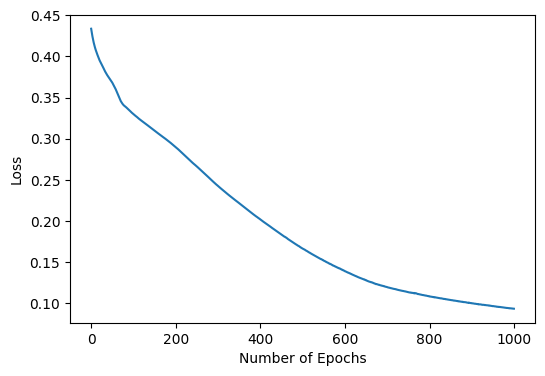

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Loss')
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

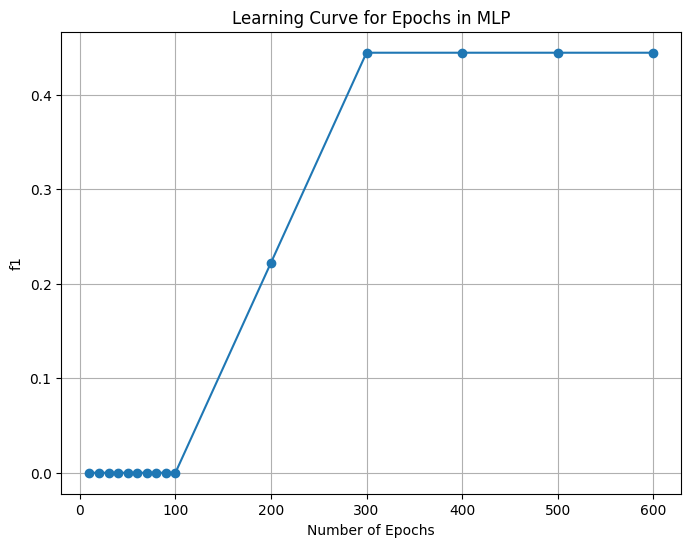

In [45]:
# Initialize lists to store results
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200,300,400,500,600]
accuracy_scores = []

# Train the MLP with varying numbers of epochs
for num_epochs in epochs:
    model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=num_epochs, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(f1_score(y_test, y_pred))

# Create the learning curve plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy_scores, marker='o')
plt.title("Learning Curve for Epochs in MLP")
plt.xlabel("Number of Epochs")
plt.ylabel("f1")
plt.grid(True)
plt.show()

The validation loss is the prediction vs true labels, similar to what we use for other learning curves. But the training loss is the value of the loss function at each iteration that it uses to update the weights.

/usr/local/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3

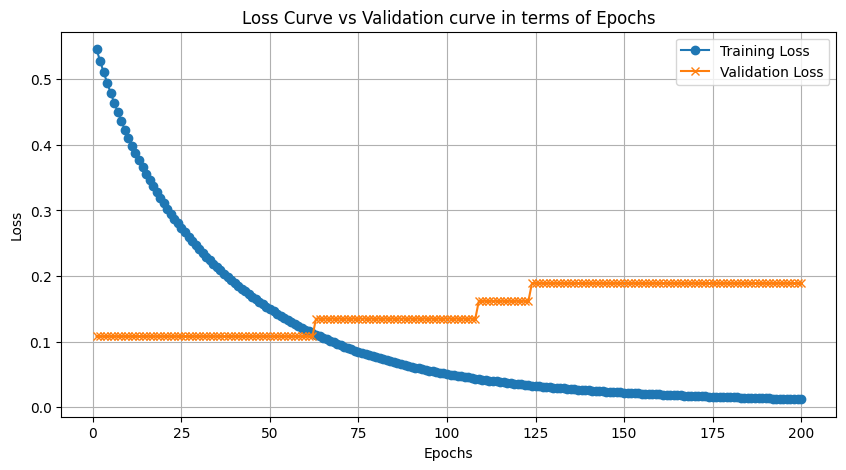

In [66]:
# Lists to store training and validation loss
training_loss_r = []
validation_loss_r = []

mlp = MLPClassifier(activation='relu')

# Training Loop
for epoch in range(mlp.max_iter):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique (y_train))
    training_loss_r.append(mlp.loss_)
    validation_loss_r.append(1-mlp.score(x_test, y_test))
    #print(f"Epoch {epoch + 1}/{mlp.max_iter} - Training Loss: {mlp.loss_:.4f} - Validation Loss: {validation_loss_r:.4f}")


# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, mlp.max_iter + 1), training_loss_r, label='Training Loss', marker='o')
plt.plot(range(1, mlp.max_iter + 1), validation_loss_r, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve vs Validation curve in terms of Epochs')
plt.legend()
plt.grid(True)
plt.show()

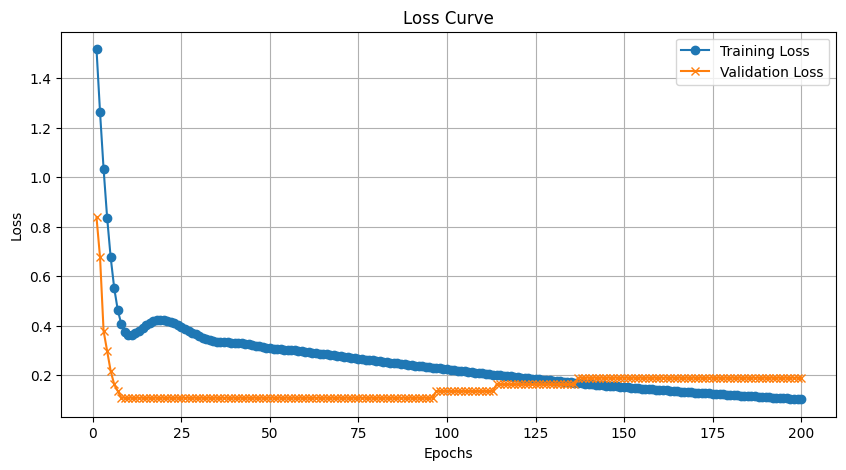

In [48]:
# Lists to store training and validation loss
training_loss_r = []
validation_loss_r = []

mlp = MLPClassifier(activation='relu')

# Training Loop
for epoch in range(mlp.max_iter):
    mlp.partial_fit(x_train, y_train, classes=np.unique (y_train))
    training_loss_r.append(mlp.loss_)
    validation_loss_r.append(1-mlp.score(x_test, y_test))
    #print(f"Epoch {epoch + 1}/{mlp.max_iter} - Training Loss: {mlp.loss_:.4f} - Validation Loss: {validation_loss_r:.4f}")


# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, mlp.max_iter + 1), training_loss_r, label='Training Loss', marker='o')
plt.plot(range(1, mlp.max_iter + 1), validation_loss_r, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

## After GridSearch MLP

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

mlp1gs = MLPClassifier(
                random_state=1,
                hidden_layer_sizes = (100,3),
                activation = 'relu',
                max_iter=500,
                )

mlp1gs.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 3), max_iter=500, random_state=1)

In [26]:
y_pred = mlp1gs.predict(x_test)


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       0.00      0.00      0.00         4

    accuracy                           0.89        37
   macro avg       0.45      0.50      0.47        37
weighted avg       0.80      0.89      0.84        37



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


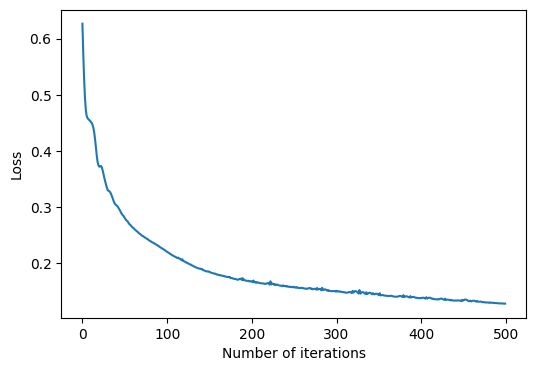

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(mlp1gs.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

In [54]:
# Define different training set sizes (e.g., 10%, 20%, ..., 90% of the data)
train_sizes, train_scores, test_scores = learning_curve(
mlp1gs , X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

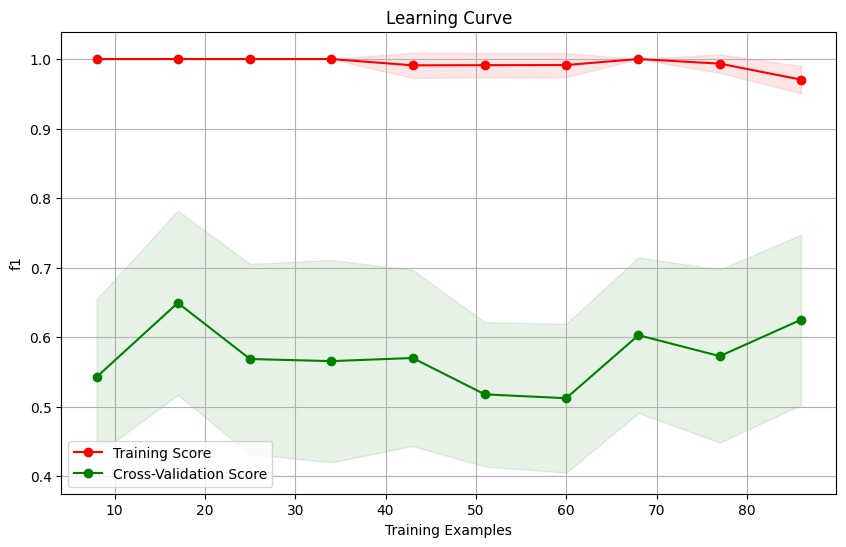

In [55]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("f1")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

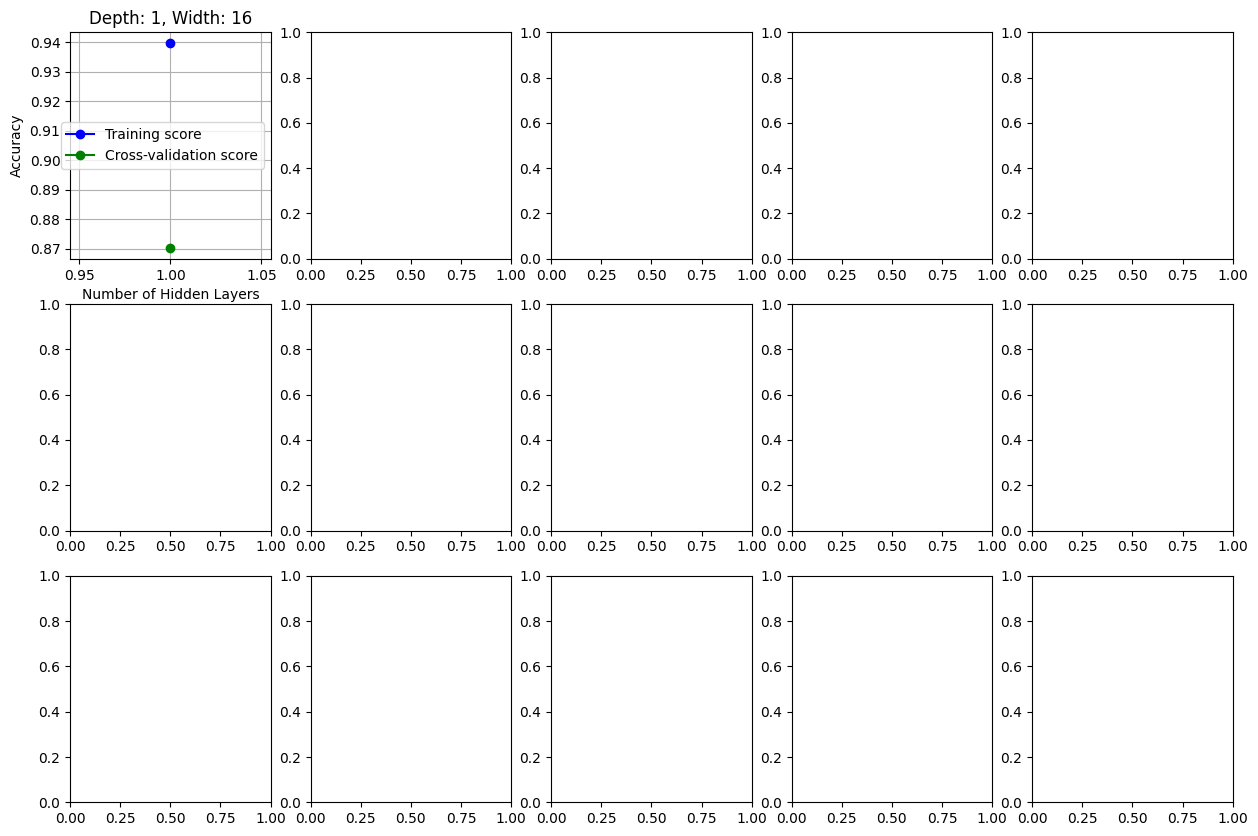

In [46]:
from sklearn.model_selection import validation_curve
# Define ranges of values for the number of hidden layers and neurons
param_range_depth = np.arange(1, 6)  # Range for the number of hidden layers
param_range_width = [16, 32, 64]    # Range for the number of neurons in each hidden layer

# Create a grid of plots
fig, axes = plt.subplots(len(param_range_width), len(param_range_depth), figsize=(15, 10))

for i, width in enumerate(param_range_width):
    for j, depth in enumerate(param_range_depth):
        # Create a neural network classifier with the specified depth and width
        hidden_layer_sizes = tuple([width] * depth)
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000)

        # Create a validation curve for this architecture
        train_scores, test_scores = validation_curve(
            mlp, x_train, y_train, param_name="hidden_layer_sizes", param_range=[hidden_layer_sizes],
            cv=5, scoring="accuracy"
        )

        # Calculate the mean training and test scores
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        # Plot the validation curve in the corresponding subplot
        ax = axes[i, j]
        ax.plot(range(1, depth + 1), train_mean, label="Training score", color="blue", marker="o")
        ax.plot(range(1, depth + 1), test_mean, label="Cross-validation score", color="green", marker="o")
        ax.set_title(f"Depth: {depth}, Width: {width}")
        ax.set_xlabel("Number of Hidden Layers")
        ax.set_ylabel("Accuracy")
        ax.legend(loc="best")
        ax.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perce

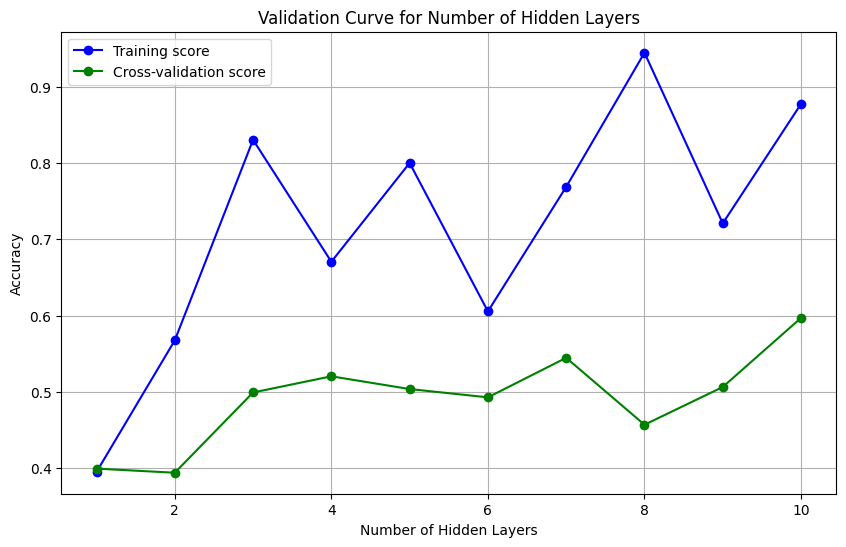

In [51]:
# Define a range of values for the number of hidden layers
param_range = np.arange(1, 11)

# Create a neural network classifier
mlp = MLPClassifier(max_iter=1000)

# Create a validation curve for the number of hidden layers
train_scores, test_scores = validation_curve(
    mlp, x_train, y_train, param_name="hidden_layer_sizes", param_range=param_range,
    cv=5, scoring="f1_macro"
)

# Calculate the mean training and test scores for each number of hidden layers
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green", marker="o")
plt.title("Validation Curve for Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Adult Dataset

## Preprocessing


In [3]:
X2_train = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Train.csv')
X2_test = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Test.csv')
y2_train = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Train.csv')    
y2_test = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Test.csv')

In [4]:
X2_train = X2_train.drop('Unnamed: 0', axis=1)
X2_test = X2_test.drop('Unnamed: 0', axis=1)
y2_train = y2_train.drop('Unnamed: 0', axis=1)
y2_test = y2_test.drop('Unnamed: 0', axis=1)
X2_train = X2_train.drop('Unnamed: 0.1', axis=1)
X2_test = X2_test.drop('Unnamed: 0.1', axis=1)



In [5]:
#X_train, X_test, y_train, y_test = train_test_split(classifieddata, column_labels, test_size=0.2, random_state=42)
# Standardize features using StandardScaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [6]:
y2_train_new = y2_train.values.reshape(-1)

In [7]:

# Define and train a simple neural network using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X2_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])


In [13]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
model.fit(X2_train_scaled, y2_train, epochs=10, batch_size=32, validation_data=(X2_test_scaled, y2_test))

Epoch 1/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3459 - accuracy: 0.8397 - val_loss: 0.3287 - val_accuracy: 0.8452
Epoch 2/10
1018/1018 [==============================] - 1s 1ms/step - loss: 0.3251 - accuracy: 0.8472 - val_loss: 0.3217 - val_accuracy: 0.8486
Epoch 3/10
1018/1018 [==============================] - 1s 1ms/step - loss: 0.3206 - accuracy: 0.8500 - val_loss: 0.3240 - val_accuracy: 0.8476
Epoch 4/10
1018/1018 [==============================] - 1s 1ms/step - loss: 0.3174 - accuracy: 0.8518 - val_loss: 0.3207 - val_accuracy: 0.8476
Epoch 5/10
1018/1018 [==============================] - 1s 1ms/step - loss: 0.3148 - accuracy: 0.8530 - val_loss: 0.3222 - val_accuracy: 0.8479
Epoch 6/10
1018/1018 [==============================] - 1s 1ms/step - loss: 0.3116 - accuracy: 0.8538 - val_loss: 0.3202 - val_accuracy: 0.8497
Epoch 7/10
1018/1018 [==============================] - 1s 1ms/step - loss: 0.3099 - accuracy: 0.8540 - val_loss: 0.3185 - val_accuracy:

In [16]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X2_test_scaled, y2_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

509/509 [==============================] - 0s 812us/step - loss: 0.3194 - accuracy: 0.8484
Test loss: 0.3194, Test accuracy: 0.8484


## GridSearch 
Best Parameters: {'hidden_layer_sizes': (40,), 'max_iter': 700} Best Score: 0.852400241097846 Test Score: 0.8512376389656655


Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 100, 'learning_rate_init': 0.01}
100
0.01

In [8]:
y2_train_new = y2_train.values.reshape(-1)

In [18]:
h_units = [75, 100, 150]
learning_rates = [0.01, 0.05, .1]
param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates, 'max_iter': [200,500,1000]}

net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='logistic',random_state=100),
                    param_grid=param_grid, cv=10)
net.fit(X2_train_scaled, y2_train_new)
print("Per Hyperparameter tuning, best parameters are:")
print(net.best_params_)
print(net.best_params_['hidden_layer_sizes'])
print(net.best_params_['learning_rate_init'])

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 100, 'learning_rate_init': 0.01}
100
0.01


In [65]:
# Initialize MLPClassifier
mlp = MLPClassifier()

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(10,10,10,10,10,10,10,10,10,10,10),(15,15,15,15,15,15,15),( 15,15,15,15,15), (10,10,10,10,10)],  # You can also try different layer configurations like (50,50) for two layers of 50
    'max_iter': [300,600, 1100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Perform grid search on training data
grid_search.fit(X2_train_scaled, y2_train_new)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# You can also get the best estimator directly
best_estimator = grid_search.best_estimator_

# Evaluate on the test set
test_score = best_estimator.score(X2_test_scaled, y2_test)
print(f"Test Score: {test_score}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=1100; total time=  31.5s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=300; total time=  47.4s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=600; total time=  51.4s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=300; total time=  57.6s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=300; total time= 1.0min
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=300; total time= 1.1min
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=600; total time= 1.1min
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=1100; total time= 1.2min
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_ite

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=(15, 15, 15, 15, 15), max_iter=300; total time= 1.6min
[CV] END hidden_layer_sizes=(15, 15, 15, 15, 15), max_iter=600; total time=  47.6s
[CV] END hidden_layer_sizes=(15, 15, 15, 15, 15), max_iter=600; total time= 1.3min
[CV] END hidden_layer_sizes=(15, 15, 15, 15, 15), max_iter=600; total time= 1.0min
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=300; total time=  38.9s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=600; total time=  20.6s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=300; total time=  49.0s
[CV] END hidden_layer_sizes=(15, 15, 15, 15, 15), max_iter=1100; total time=  55.0s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=300; total time=  55.9s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=300; total time=  52.2s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=300; total time=  55.9s
[CV] END hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=600; total time=  31.9s
[CV

## MLP model

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

mlp2 = MLPClassifier(
                random_state=1,
                hidden_layer_sizes = (10,10,10,10,10),
                activation = 'relu',
                solver = 'adam',
                learning_rate_init = 0.1,
                alpha = 0,
                n_iter_no_change = 25,
                max_iter=1100,
                )

mlp2.fit(X2_train_scaled, y2_train_new)




MLPClassifier(alpha=0, hidden_layer_sizes=(10, 10, 10, 10, 10),
              learning_rate_init=0.1, max_iter=1100, n_iter_no_change=25,
              random_state=1)

In [13]:
y2_pred = mlp2.predict(X2_test_scaled)
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
print("F1:",metrics.f1_score(y2_test, y2_pred))

In [15]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     12435
           1       0.79      0.48      0.60      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.72      0.75     16281
weighted avg       0.84      0.85      0.83     16281



In [10]:
# Define different training set sizes (e.g., 10%, 20%, ..., 90% of the data)
train_sizes, train_scores, test_scores = learning_curve(
mlp2 , X2_train_scaled, y2_train_new, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

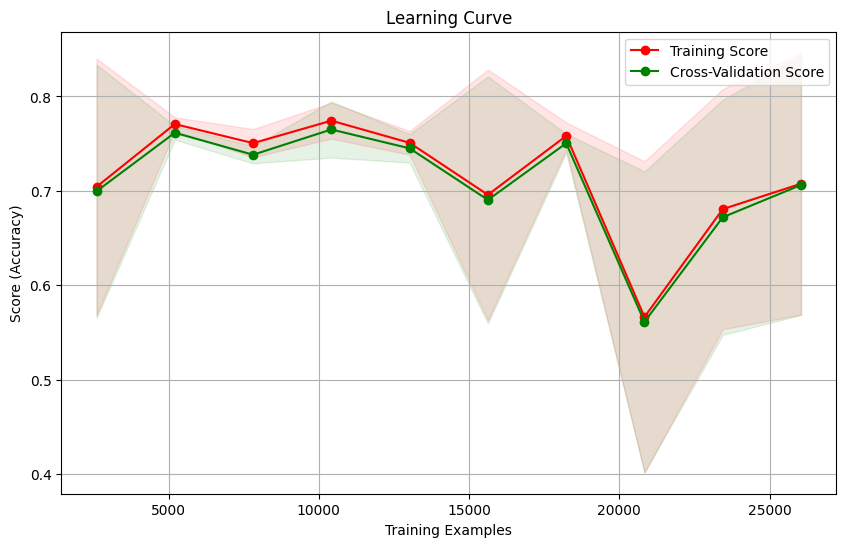

In [12]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

## Iterations/epochs vs Loss Curve

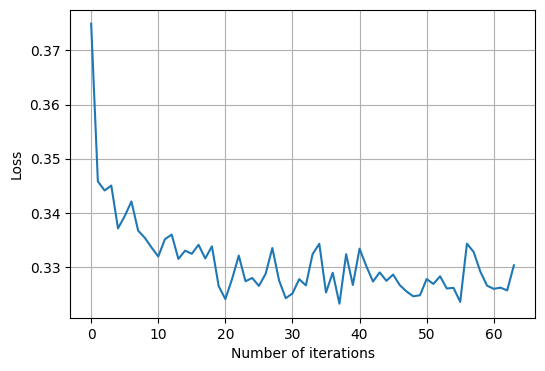

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(mlp2.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# Lists to store training and validation loss
training_loss_r = []
validation_loss_r = []

# Training Loop
for epoch in range(mlp.max_iter):
    mlp.partial_fit(x_train, y_train, classes=np.unique (y_train))
    training_loss_r.append(mlp.loss_)
    validation_loss_r.append(1-mlp.score(x_test, y_test))
    #print(f"Epoch {epoch + 1}/{mlp.max_iter} - Training Loss: {mlp.loss_:.4f} - Validation Loss: {validation_loss_r:.4f}")


# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, mlp.max_iter + 1), training_loss_r, label='Training Loss', marker='o')
plt.plot(range(1, mlp.max_iter + 1), validation_loss_r, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

## Hidden layer Size Validation Curve

In [54]:
f1_test = []
f1_train = []
hlist = np.linspace(1,150,30).astype('int')
for i in hlist:         
        clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                            learning_rate_init=0.05, random_state=100)
        clf.fit(X2_train_scaled, y2_train_new)
        y2_pred_test = clf.predict(X2_test_scaled)
        y2_pred_train = clf.predict(X2_train_scaled)
        f1_test.append(f1_score(y2_test, y2_pred_test))
        f1_train.append(f1_score(y2_train, y2_pred_train))
    


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


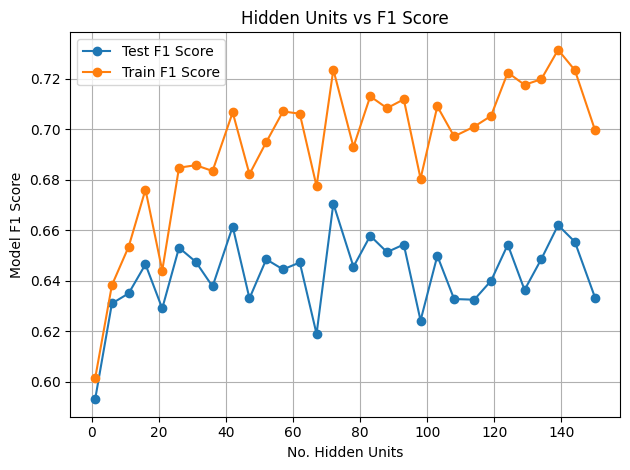

In [24]:
plt.plot(hlist, f1_test, 'o-', label='Test F1 Score')
plt.plot(hlist, f1_train, 'o-',  label='Train F1 Score')
plt.ylabel('Model F1 Score')
plt.xlabel('No. Hidden Units')
plt.grid(True)
plt.title("Hidden Units vs F1 Score")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Number of HIdden Layers Validation Curve

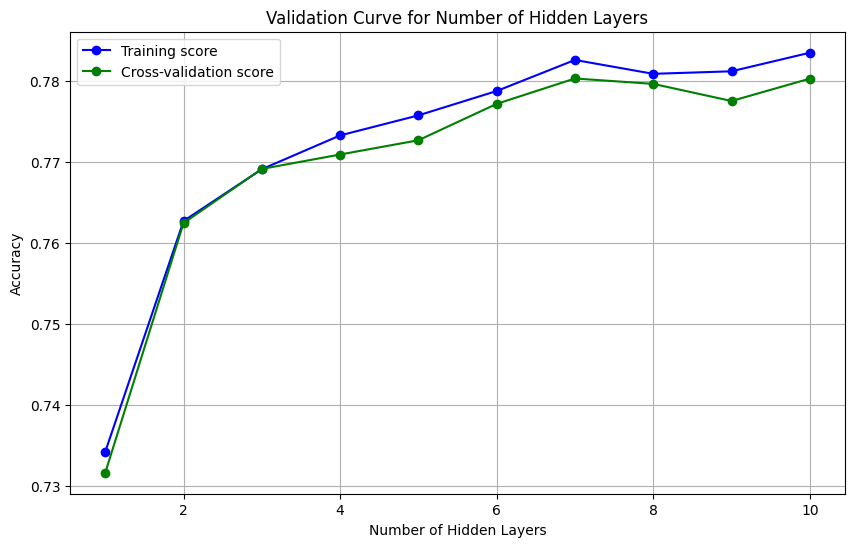

In [61]:
# Define a range of values for the number of hidden layers
param_range = np.arange(1, 11)

# Create a neural network classifier
mlp2 = MLPClassifier(max_iter=1000)

# Create a validation curve for the number of hidden layers
train_scores, test_scores = validation_curve(
    mlp2, X2_train_scaled, y2_train_new, param_name="hidden_layer_sizes", param_range=param_range,
    cv=5, scoring="f1_macro"
)

# Calculate the mean training and test scores for each number of hidden layers
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)



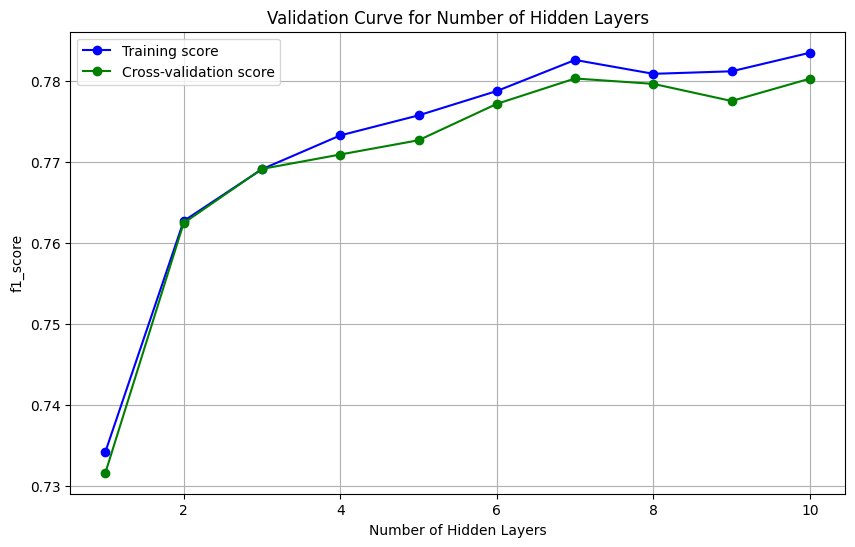

In [62]:
# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker="o")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green", marker="o")
plt.title("Validation Curve for Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("f1_score")
plt.legend(loc="best")
plt.grid(True)
plt.show()